In [1]:
import numpy as np 
from sklearn.manifold import TSNE as t_sne
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import LocallyLinearEmbedding as lle
import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D
%matplotlib inline 

from ipywidgets import *
import pickle
import time

# Section III B: Applying the Algorithms

In this section, an ordinary Swiss roll with 1000 data points and noise set to 0.01 is used. The effect of the  hyperparameters for t-SNE and LLE, perplexity and number of neighbours, is explored. 

## Importing and plotting the data set: 

In [2]:
X, color=make_swiss_roll(1000, noise=0.01)

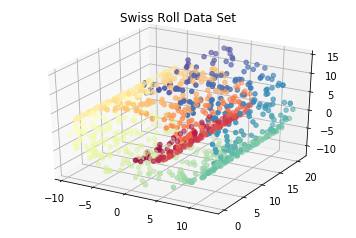

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll Data Set")
plt.savefig('dataset.pdf')
plt.show()

## Applying t-SNE

We want to apply the t-SNE algorithm, and play around with the hyperparameter, the perplexity. 

In [4]:
## Lager noen plottefunksjoner her nå, som senere kan flyttes til en python fil. 
def plot_tsne(color,per,Z,i):
    """
    color: the colors of Z
    per: a list of perplexities
    Z: A list of t-SNE transformations, with different perplexities s.t. Z[i] has perplexity per[i]. 
    i: the index of the transformation we want to plot
    """
    print('The perpelxity is', per[i])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("t-SNE")
    ax.scatter(Z[i][:, 0], Z[i][:, 1], c=color, cmap=plt.cm.Spectral)
    plt.show()
    

In [13]:
"""Want to make an interactive plot with a wide range of perplexities. In order to do that we first create a list, Z,
consisting of a trnsformation for each perpelxity. It takes some time to create all of the transformations, therefore 
we have made them available in a pickle"""

per=np.arange(2,150,4) 
create=True
if create: 
    Z=[]
    times=np.zeros(len(per))
    kl_divergence=np.zeros(len(per))
    for i, p in enumerate(per):
        tsne=t_sne(perplexity=p)
        start_time=time.time()
        Z.append(tsne.fit_transform(X))
        times[i]= time.time()-start_time
        kl_divergence[i]=tsne.kl_divergence_
    pickle.dump( Z, open("Z_tsne.pkl", "wb")) 
    pickle.dump(color, open("color.pkl","wb"))
    pickle.dump(per, open("per.pkl","wb"))
    pickle.dump(times, open("times.pkl","wb"))
    pickle.dump(kl_divergence, open("kl_divergence.pkl","wb"))
else: 
    Z= pickle.load(open("Z_tsne.pkl", "rb"))
    color=pickle.load(open("color.pkl", "rb"))
    per=pickle.load(open("per.pkl", "rb"))
    times=pickle.load(open("times.pkl", "rb"))

In [14]:
interactive(plot_tsne, Z=fixed(Z), color=fixed(color),per=fixed(per), i=widgets.IntSlider(min=0,max=len(per)-1,step=1, value=0))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


In [7]:
""" Want to plot interesting perplexities on their own"""

def plot_and_save_tsne(perplexity, filename, Z=pickle.load(open("Z_tsne.pkl", "rb")), per=pickle.load(open("per.pkl", "rb")), color=pickle.load(open("color.pkl", "rb"))):
    if np.argwhere(per==perplexity).flatten(): 
        i=np.argwhere(per==perplexity).flatten()[0]
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_title("t-SNE")
        ax.scatter(Z[i][:, 0], Z[i][:, 1], c=color, cmap=plt.cm.Spectral)
        plt.savefig(filename)
        plt.show()
    else: 
        print('Transformation is not made for this perpexity, availiable perplexities are:', per)

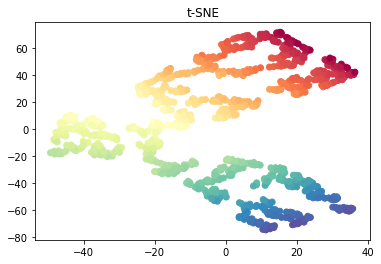

In [8]:
plot_and_save_tsne(17, "per12.pdf")

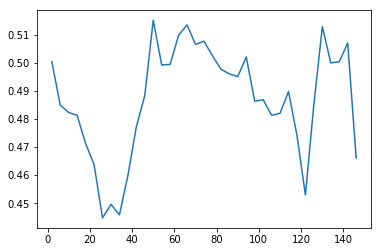

In [15]:
plt.plot(per,kl_divergence)

[  2   6  10  14  18  22  26  30  34  38  42  46  50  54  58  62  66  70
  74  78  82  86  90  94  98 102 106 110 114 118 122 126 130 134 138 142
 146]


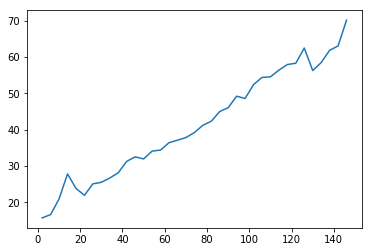

In [17]:
plt.plot(per,times)
print(per)